# CNN-lytical Assignment-3
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7fZ0PJ4leQi4qtXR5Egv5YILqQqvzVSNtFg&usqp=CAU">
</center>

*  In this assignment, we will use CNNs in [PyTorch](https://pytorch.org/docs/stable/index.html) for image classification.

* We have been using MNIST by flattening 28$\times$28 images to 784-sized vectors.

* This time, we will classify images from the CIFAR-10 dataset - dimension is 32$\times$32.

* Much of this notebook remains the same as for Assignment 2, just minor changes would be needed and this assignment won't take long.

**Feel free to redefine any function signatures below, just make sure the final cell remains the same.**

## Import libraries here
PyTorch, NumPy, Matplotlib, ...
Even when equipped with PyTorch, NumPy and Matplotlib make your work easier for visualization etc.

Note the following method to **initialize the seed** for reproducibility of results, both for NumPy & PyTorch (CPU/CUDA).

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import torch
from sklearn.metrics import confusion_matrix
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import os
import seaborn as sns
# torch.manual_seed(42)
# np.random.seed(42)

In [2]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed(42)

## Load *Dataset*
Use the [pickle file](https://drive.google.com/file/d/1_IHICOfAsT7x63VBBuN1WMh4bDqtUThp/view?usp=sharing) shared for this assignment here.

In [3]:
# mount Google Drive to access the dataset
!gdown 1_IHICOfAsT7x63VBBuN1WMh4bDqtUThp

np.random.seed(42)
# load the data set
with open('train_cifar.pkl', 'rb') as f:
  dataset = pickle.load(f)


#X = pass
#y = pass
X = dataset['X']
y = dataset['y']
X = np.array(X)
y = np.array(y)

# normalize
X_normalised = (X - np.mean(X, axis=0))/255

# Split into X_train, y_train, X_test, y_test
# you can use stratified splitting from sklearn library
X_train, X_test, y_train_unencoded, y_test_unencoded = train_test_split(X_normalised, y, test_size=0.2)

Downloading...
From: https://drive.google.com/uc?id=1_IHICOfAsT7x63VBBuN1WMh4bDqtUThp
To: /content/train_cifar.pkl
100% 154M/154M [00:01<00:00, 123MB/s]


In [4]:
X_train.min()

-0.5524001568627451

In [5]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

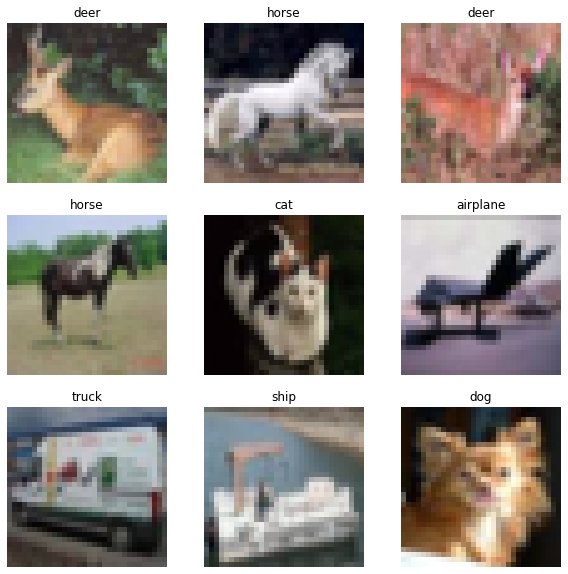

In [6]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
np.random.seed(42)
random_image_indices = np.random.randint(0, X_train.shape[0], (16))
# fig, ax = plt.subplots(4, 4, figsize=(7, 7))
# plt.subplots_adjust(wspace=0.1, hspace = 0.5 )
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
  j = random_image_indices[i]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X[j])
  plt.title(y_classes[y[j][0]])
  plt.axis("off")

In [7]:
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train_unencoded)
y_test = one_hot_encoder.fit_transform(y_test_unencoded)

In [8]:
import torchvision.transforms as transforms
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)



In [9]:
# X_train = torch.reshape(X_train, (-1, 3072))
# X_test = torch.reshape(X_test, (-1, 3072))


In [10]:
y_train.shape

torch.Size([40000, 10])

## Creating a Dataset Class
In PyTorch, there is existing implementation of batch-splitting. You don't need to do it manually over here. Instead, just define a Dataset class and a Dataloader wrapping it.

A dataset class must have 3 functions - ```__init__```, ```__len__```, ```__getitem__```. Their names are pretty self-explanatory. You can read more about this [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

You will have to perform normalization, augmentation on the dataset here itself, have a look at [PyTorch Transforms](https://pytorch.org/vision/stable/transforms.html).

**Note -** While initializing the dataset class object, make sure you only pass the numpy arrays for images and labels. So the ```__init__``` function should look like
```
    def __init__(self, X, y):
```

In [11]:
# define your dataset class






## ```nn.Module``` for your model
In this segment, define a class for your model, it has to inherit from the ```nn.Module``` class. You must define two functions here - ```__init__``` and ```forward```, again pretty self-explanatory. Helper functions can also be implemented, your choice!

Look into the following ```torch``` layers beyond those you used in the second assignment and combine them to form your network, you can find more [here](https://pytorch.org/docs/stable/nn.html) -
- [```nn.Conv2d```](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [```nn.BatchNorm2d```](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)


In [12]:
# define a child class of nn.Module for your model
# specify the architecture here itself

class myNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 4, padding='same')
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 4, 3, padding='same')
        self.conv3 = nn.Conv2d(4, 2, 3, padding='same')
        self.fc1 = nn.Linear(2*16*16, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = (F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


## Training loop
You can write a training loop but usually writing it within a function helps so that you can train in multiple passes with just one function call if you still don't see convergence of the loss. ```display_step``` is for you to display results on the validation set (which you must not have trained upon).

You will need to use ```zero_grad()```, ```backward()``` and multiple such functions here. Look for them in the tutorials given.

train(net, optimizer, criterion, X_batch_train.permute(0, 3, 1, 2), y_batch_train, 1)

X_batch_train = X_train[32*i:32*i + 32, :, :, :]<br>

  y_batch_train = y_train[32*i:32*i + 32]

In [44]:
def train(model, optimizer, criterion, train_loader, train_labels, num_epochs, display_step=None):
  train_epoch_loss_list=[]
  epoch_running_loss=0.0
  running_loss=0.0
  for epoch in range(num_epochs):
    epoch_running_loss=0.0
    running_loss=0.0
    for j in range(train_loader.shape[0]//128):

      X_batch_train_loader = train_loader[128*i:128*i + 128, :, :, :]
      y_batch_train_loader = train_labels[128*i: 128*i+128]
      input= X_batch_train_loader.permute(0, 3, 1, 2)
      output=model.forward(input.float())
      loss=criterion(output, y_batch_train_loader)
      loss.backward()
      optimizer.step()
      epoch_running_loss+= loss.item()
      running_loss = loss.item()
      #print(running_loss)
      #print('.', end=' ')

    print(f'[{epoch + 1}] loss: {epoch_running_loss/(40000//128):.3f}')
    train_epoch_loss_list.append(epoch_running_loss/(40000//128))
    models_list.append(model)
    predictions_np_training = predict(model, X_test.permute(0, 3, 1, 2))
    predictions_np_training
    print(f"The accuracy after training for {epoch + 1} epochs is {accuracy(predictions_np_training, y_test_unencoded)}")
    # if(epoch>6):
    #   current_epoch_loss = train_epoch_loss_list[-1]
    #   prev_epochs_loss_averaged = (train_epoch_loss_list[-2] + train_epoch_loss_list[-3] + train_epoch_loss_list[-4])/3  #+ train_epoch_loss_list[-3] + train_epoch_loss_list[-4]
    #   if(current_epoch_loss > prev_epochs_loss_averaged):
    #     break 
 
    

## Initialize weights
Write a small function to initialize weights for your model. You don't need to do it individually for each layer, there are ways to do it in a simple ```for``` loop.

In [14]:
# def init_weights(...):
#     pass

## Prediction & Accuracy
Prediction function should predict outputs using your trained model for a given **NumPy array** ```X_test``` and the output should be another **NumPy array**.

The accuracy function would be the same as before.

In [15]:
def predict(model, X_test):
  output=model(X_test.float())
  predictions = torch.argmax(output, dim=1)
  return predictions.numpy()

In [16]:
def accuracy(pred, labels): #takes numpy arrays 
  anomaly_array = pred - labels.reshape(10000, )
  misprediction_count = np.count_nonzero(anomaly_array)
  total_array_count = len(labels)
  error = misprediction_count/total_array_count
  return (1-error)

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [45]:
import torch.optim as optim
net=myNet()
models_list = []
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.000001, momentum=0.9)


In [46]:
X_train.shape

torch.Size([40000, 32, 32, 3])

In [47]:
train(net, optimizer, criterion, X_train, y_train, 35)

[1] loss: 2.307
The accuracy after training for 1 epochs is 0.10060000000000002
[2] loss: 2.302
The accuracy after training for 2 epochs is 0.10060000000000002
[3] loss: 2.295
The accuracy after training for 3 epochs is 0.09899999999999998
[4] loss: 2.291
The accuracy after training for 4 epochs is 0.09899999999999998
[5] loss: 2.291
The accuracy after training for 5 epochs is 0.10629999999999995
[6] loss: 2.283
The accuracy after training for 6 epochs is 0.16720000000000002
[7] loss: 2.269
The accuracy after training for 7 epochs is 0.16759999999999997
[8] loss: 2.213
The accuracy after training for 8 epochs is 0.13690000000000002
[9] loss: 2.101
The accuracy after training for 9 epochs is 0.16269999999999996
[10] loss: 2.008
The accuracy after training for 10 epochs is 0.19710000000000005
[11] loss: 1.858
The accuracy after training for 11 epochs is 0.17259999999999998
[12] loss: 1.645
The accuracy after training for 12 epochs is 0.19230000000000003
[13] loss: 1.468
The accuracy afte

KeyboardInterrupt: ignored

In [ ]:
# for i in range(40000//32):
#   X_batch_train = X_train[32*i:32*i + 32, :, :, :]
#   y_batch_train = y_train[32*i:32*i + 32]
#   train(net, optimizer, criterion, X_batch_train.permute(0, 3, 1, 2), y_batch_train, 1)
#   print(f'batch number {i}')
# #the number of epochs and momentum has been obtained by experimenting with different LRs and M parameters

## Run your model for the validation dataset
Use your trained model to get predictions for the validation dataset you split earlier.

In [ ]:
models_list

In [36]:
predictions_np = predict(models_list[30], X_test.permute(0, 3, 1, 2))
predictions_np

array([6, 3, 8, ..., 4, 1, 3])

In [37]:
np.unique(predictions_np)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
np.unique(y_test_unencoded)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [39]:
print(accuracy(predictions_np, y_test_unencoded))

0.14649999999999996


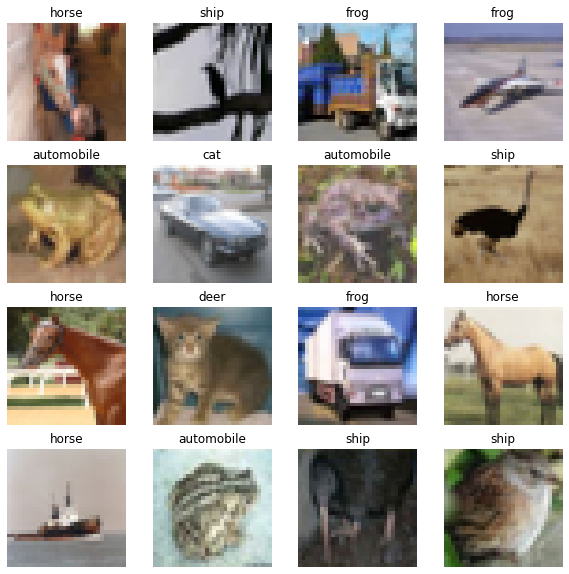

In [26]:
# display a 4x4 grid, 
# choose 16 images randomly, display the images as well as corresponding labels
np.random.seed(21)
random_image_indices = np.random.randint(0, X_train.shape[0], (16))
# fig, ax = plt.subplots(4, 4, figsize=(7, 7))
# plt.subplots_adjust(wspace=0.1, hspace = 0.5 )
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(16):
  j = random_image_indices[i]
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(X[j])
  plt.title(y_classes[predictions_np[y[j][0]]])
  plt.axis("off")

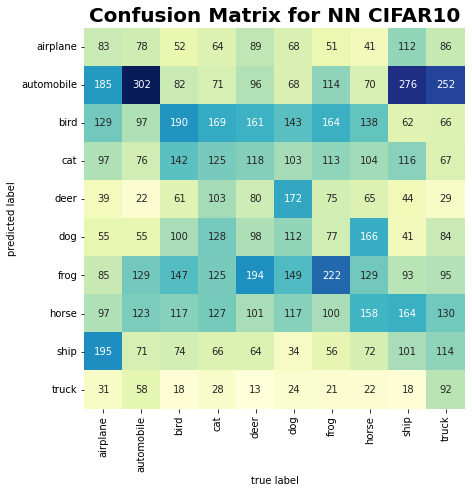

In [27]:
fig=plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_test_unencoded, predictions_np).T, square=True, annot=True, fmt='d', cmap='YlGnBu', cbar=False,
 xticklabels=y_classes, yticklabels=y_classes)
plt.xlabel('true label')
plt.title('Confusion Matrix for NN CIFAR10', fontsize=20, weight='bold')
plt.ylabel('predicted label');
#confusion matrix

## Submission
To submit your solution, you will need to make a file with name ```model.py``` containing imports necessary to write the model class and the model class itself. It shouldn't do anything else when run. Also create a file ```dataset.py``` with the dataset class and all necessary imports. Other than this, save the trained model in a file named ```ass_2.pt```. When you are done with the assignment, commit the updated notebook, the ```model.py```, ```dataset.py``` class files and the ```ass_2.pt``` model-weights file to the repository.

In [ ]:
from google.colab import files
torch.save(final_model, 'ass_2.pt')
files.download('ass_2.pt') # download the file from the Colab session for submission

NameError: ignored

Check if it got saved right!

In [ ]:
# load the model, use predict function
